**Attribute Information**

**Age:** age of the patient [years]

**Sex:** sex of the patient [M: Male, F: Female]

**ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

**RestingBP:** resting blood pressure [mm Hg]

**Cholesterol:** serum cholesterol [mm/dl]

**FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

**RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

**MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]

**Oldpeak:** oldpeak = ST [Numeric value measured in depression]

**ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

**HeartDisease:** output class [1: heart disease, 0: Normal]

In [34]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance


In [2]:
df = pd.read_csv(r'C:\Users\Rodrigo Lapsky\Documents\Dados\DataSets\Heart\heart.csv')

In [3]:
print(df.shape)
df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
print(df.duplicated().sum())
print(df.isnull().sum())

0
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
obj = df.select_dtypes(include=['object']).columns

for i in obj:
    print(df[i].value_counts())
    print('')
    print('-'*20)

Sex
M    725
F    193
Name: count, dtype: int64

--------------------
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

--------------------
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

--------------------
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

--------------------
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

--------------------


In [7]:
df['Sex'] = df['Sex'].replace({'M':0,'F':1})
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'N':0,'Y':1})
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True,dtype=int)

df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,1,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,0,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,1,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int64  
 9   ChestPainType_ATA  918 non-null    int64  
 10  ChestPainType_NAP  918 non-null    int64  
 11  ChestPainType_TA   918 non-null    int64  
 12  RestingECG_Normal  918 non-null    int64  
 13  RestingECG_ST      918 non-null    int64  
 14  ST_Slope_Flat      918 non-null    int64  
 15  ST_Slope_Up        918 non-null    int64  
dtypes: float64(1), int64(15)
m

In [9]:
df = df[[c for c in df if c != 'HeartDisease'] + ['HeartDisease']]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   ChestPainType_ATA  918 non-null    int64  
 9   ChestPainType_NAP  918 non-null    int64  
 10  ChestPainType_TA   918 non-null    int64  
 11  RestingECG_Normal  918 non-null    int64  
 12  RestingECG_ST      918 non-null    int64  
 13  ST_Slope_Flat      918 non-null    int64  
 14  ST_Slope_Up        918 non-null    int64  
 15  HeartDisease       918 non-null    int64  
dtypes: float64(1), int64(15)
m

---

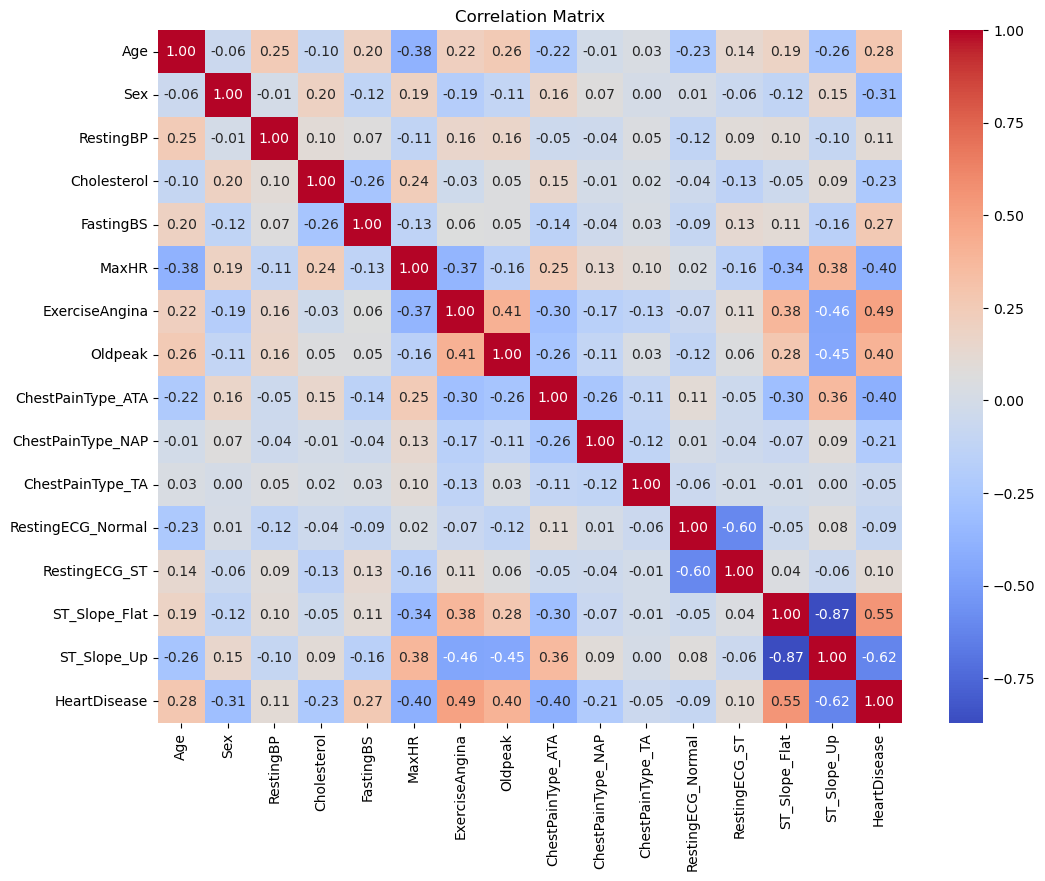

In [11]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),
            annot=True,
            fmt='.2f',
            cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();
            

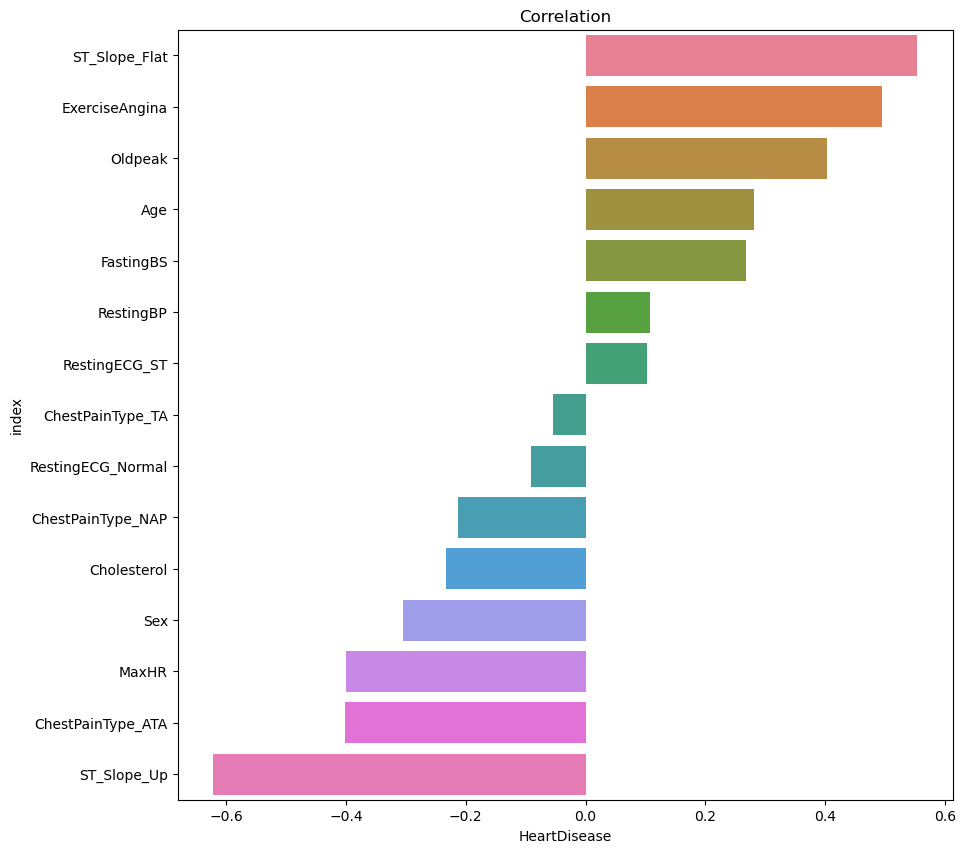

In [12]:
graf = df.corr()['HeartDisease'].sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,10))
sns.barplot(data=graf.iloc[1:],
            x=graf['HeartDisease'],
            y='index',
            palette=sns.color_palette('husl',15))
plt.title('Correlation')
plt.show();


---

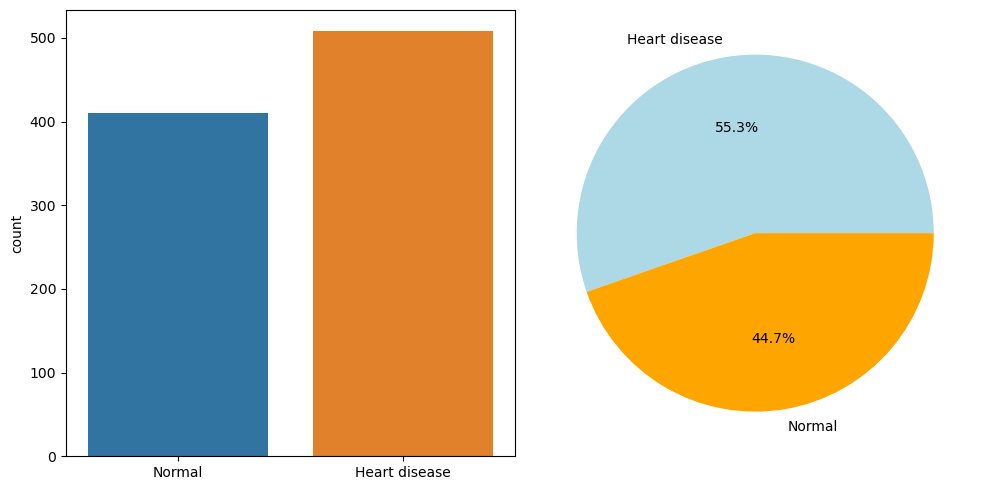

In [13]:
df['HeartDisease'].value_counts()

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1) 
sns.countplot(data=df,
              x='HeartDisease',
              palette='tab10')
plt.xticks(ticks=[0, 1],
           labels=['Normal', 'Heart disease'])
plt.xlabel(None)

plt.subplot(1, 2, 2)
df['HeartDisease'].value_counts().rename({0:'Normal', 1:'Heart disease'}).plot(kind='pie',
                                                                               colors=['lightblue','Orange'],
                                                                               autopct='%.1f%%',
                                                                               ylabel='')                         
plt.tight_layout()
plt.show();


---

In [14]:
x = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(642, 15) (276, 15)
(642,) (276,)


---

In [15]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)

accuracydt = dt.score(x_test, y_test)
print("accuracy: " + str(accuracydt))

predictiondt = dt.predict(x_test)

print(confusion_matrix(y_test, predictiondt))
print(classification_report(y_test, predictiondt))

accuracy: 0.7789855072463768
[[ 93  19]
 [ 42 122]]
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       112
           1       0.87      0.74      0.80       164

    accuracy                           0.78       276
   macro avg       0.78      0.79      0.78       276
weighted avg       0.79      0.78      0.78       276



In [16]:
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)

accuracyrf = rf.score(x_test, y_test)
print("accuracy: " + str(accuracyrf))

predictionrf = rf.predict(x_test)

print(confusion_matrix(y_test, predictionrf))
print(classification_report(y_test, predictionrf))

accuracy: 0.8731884057971014
[[ 95  17]
 [ 18 146]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       112
           1       0.90      0.89      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



In [17]:
xgbc = XGBClassifier()
xgbc = xgbc.fit(x_train, y_train)

accuracyxgb = xgbc.score(x_test, y_test)
print("accuracy: " + str(accuracyxgb))

predictionxgb = xgbc.predict(x_test)

print(confusion_matrix(y_test, predictionxgb))
print(classification_report(y_test, predictionxgb))

accuracy: 0.8442028985507246
[[ 95  17]
 [ 26 138]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       112
           1       0.89      0.84      0.87       164

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.84      0.85       276



In [18]:
lgbmc = LGBMClassifier()
lgbmc = lgbmc.fit(x_train, y_train)

accuracylg = lgbmc.score(x_test, y_test)
print("accuracy: " + str(accuracylg))

predictionlg = lgbmc.predict(x_test)

print(confusion_matrix(y_test, predictionlg))
print(classification_report(y_test, predictionlg))

[LightGBM] [Info] Number of positive: 344, number of negative: 298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535826 -> initscore=0.143548
[LightGBM] [Info] Start training from score 0.143548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [19]:
kn = KNeighborsClassifier()
kn = kn.fit(x_train, y_train)

accuracykn = kn.score(x_test, y_test)
print("accuracy: " + str(accuracykn))

predictionkn = kn.predict(x_test)

print(confusion_matrix(y_test, predictionkn))
print(classification_report(y_test, predictionkn))

accuracy: 0.717391304347826
[[ 76  36]
 [ 42 122]]
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       112
           1       0.77      0.74      0.76       164

    accuracy                           0.72       276
   macro avg       0.71      0.71      0.71       276
weighted avg       0.72      0.72      0.72       276



In [20]:
svc = SVC()
svc = svc.fit(x_train, y_train)

accuracysvc = svc.score(x_test, y_test)
print("accuracy: " + str(accuracysvc))

predictionsvc = svc.predict(x_test)

print(confusion_matrix(y_test, predictionsvc))
print(classification_report(y_test, predictionsvc))

accuracy: 0.7246376811594203
[[ 80  32]
 [ 44 120]]
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       112
           1       0.79      0.73      0.76       164

    accuracy                           0.72       276
   macro avg       0.72      0.72      0.72       276
weighted avg       0.73      0.72      0.73       276



In [21]:
mlpc = MLPClassifier() 
mlpc = mlpc.fit(x_train, y_train)

accuracymlpc = mlpc.score(x_test, y_test)
print("accuracy: " + str(accuracymlpc))

predictionmlpc = mlpc.predict(x_test)

print(confusion_matrix(y_test, predictionmlpc))
print(classification_report(y_test, predictionmlpc))

accuracy: 0.8804347826086957
[[ 97  15]
 [ 18 146]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       112
           1       0.91      0.89      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



In [22]:
gb = GradientBoostingClassifier()
gb = gb.fit(x_train, y_train)

accuracygb = gb.score(x_test, y_test)
print("accuracy: " + str(accuracygb))

predictiongb = gb.predict(x_test)

print(confusion_matrix(y_test, predictiongb))
print(classification_report(y_test, predictiongb))

accuracy: 0.8731884057971014
[[ 97  15]
 [ 20 144]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       112
           1       0.91      0.88      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



In [23]:
lg = LogisticRegression()
lg = lg.fit(x_train,y_train)

accuracylg = lg.score(x_test,y_test)
print("accuracy" + str(accuracylg))

predictionlg = lg.predict(x_test)

print(confusion_matrix(y_test, predictionlg))
print(classification_report(y_test, predictionlg))

accuracy0.8804347826086957
[[100  12]
 [ 21 143]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       112
           1       0.92      0.87      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



---

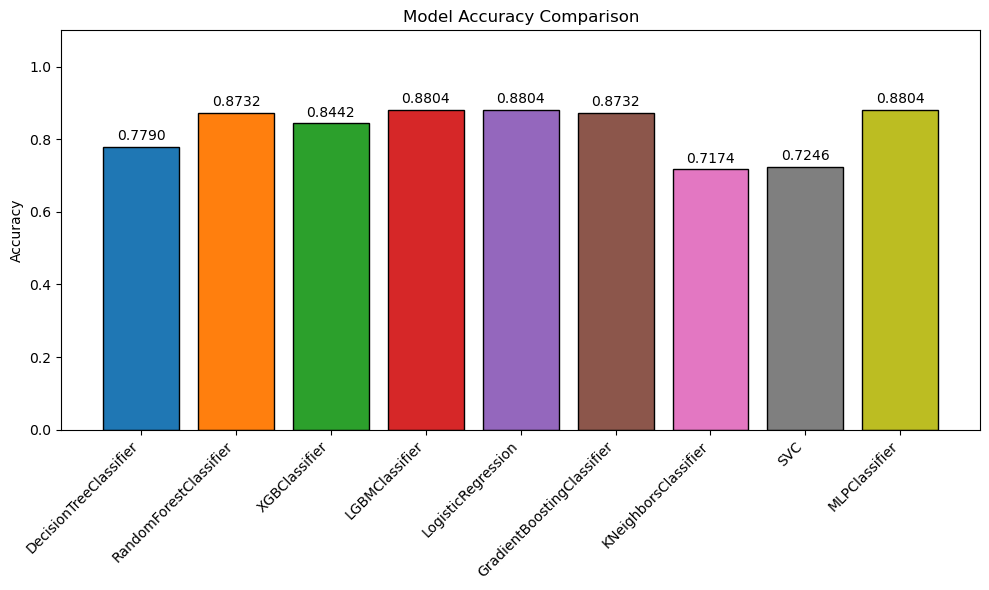

In [24]:
models_preds = { 
    "DecisionTreeClassifier": predictiondt,
    "RandomForestClassifier": predictionrf,
    "XGBClassifier": predictionxgb,
    "LGBMClassifier": predictionlg,
    "LogisticRegression": predictionlg,
    "GradientBoostingClassifier" : predictiongb,
    "KNeighborsClassifier" : predictionkn,
    "SVC" : predictionsvc,
    "MLPClassifier" : predictionmlpc}

accuracies = {name: accuracy_score(y_test, pred) for name, pred in models_preds.items()}

plt.figure(figsize=(10,6))
bars = plt.bar(accuracies.keys(),
               accuracies.values(), 
               color= plt.get_cmap('tab10').colors, 
               edgecolor='black')

plt.ylim(0, 1.1)  
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.01, 
             f"{height:.4f}", 
             ha='center', 
             va='bottom')

plt.tight_layout()
plt.show()

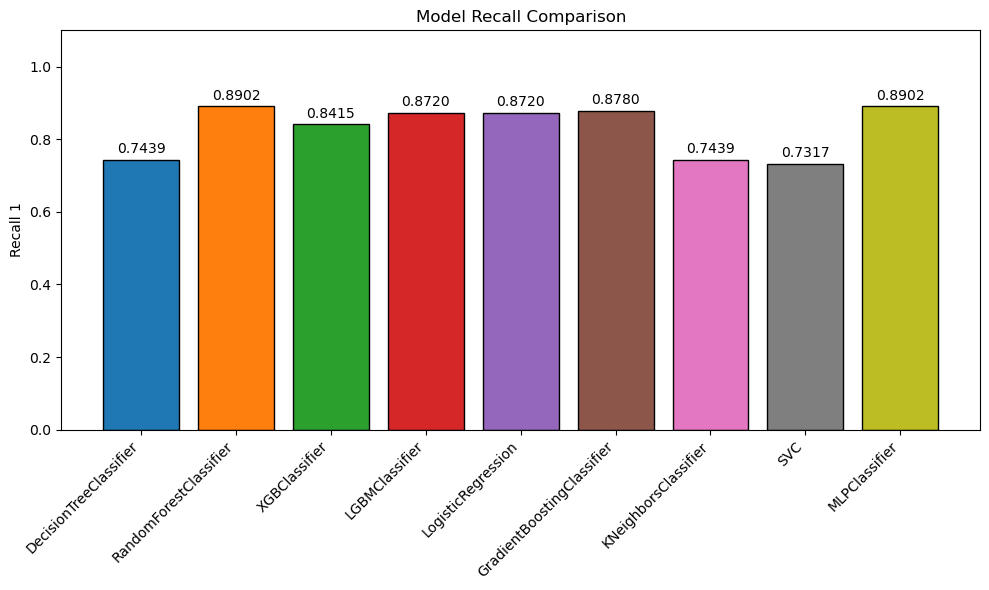

In [25]:
recalls = {name: recall_score(y_test, pred, pos_label=1) for name, pred in models_preds.items()}

plt.figure(figsize=(10,6))
bars = plt.bar(recalls.keys(),
               recalls.values(), 
               color= plt.get_cmap('tab10').colors, 
               edgecolor='black')

plt.ylim(0, 1.1)  
plt.ylabel("Recall 1")
plt.title("Model Recall Comparison") 
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.01, 
             f"{height:.4f}", 
             ha='center', 
             va='bottom')

plt.tight_layout()
plt.show()

---

In [26]:
mlp_base =MLPClassifier()
mlp_base.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [27]:
params_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
                   'activation': ['tanh', 'relu'],
                   'solver': ['sgd', 'adam'],
                   'alpha': [0.0001, 0.05],
                   'learning_rate': ['constant', 'adaptive']}

random_search_mlp = RandomizedSearchCV(estimator=mlp_base,
                                       param_distributions=params_grid_mlp,
                                       n_iter=20,          
                                       cv=10,               
                                       scoring='recall',   
                                       n_jobs=-1,
                                       random_state=42,
                                       verbose=2)

start = time.time()
random_search_mlp.fit(x_train, y_train)
end = time.time()

print(f"Training Recall (Class 1): {random_search_mlp.best_score_:.2%}")
print(f"Best MLP Hyperparameters: {random_search_mlp.best_params_}")
print(f"Training Time: {round(end - start, 2)}s")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Training Recall (Class 1): 87.53%
Best MLP Hyperparameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'tanh'}
Training Time: 59.94s


In [29]:
params_grid_mlp2= {'hidden_layer_sizes': [(100,)],
                   'activation': ['tanh'],
                   'solver': ['adam'],
                   'alpha': [0.0001],
                   'learning_rate': ['constant']}

grid_search_mlp = GridSearchCV(estimator=mlp_base,
                               param_grid=params_grid_mlp2,
                               cv=10,
                               scoring='recall', 
                               n_jobs=-1,
                               verbose=2)

start = time.time()
grid_search_mlp.fit(x_train, y_train)
end = time.time()

print(f"Training recall: {grid_search_mlp.best_score_:.2%}")
print(f"Best Hyperparameters: {grid_search_mlp.best_params_}")
print(f"Training Time: {round(end - start, 2)}s")
print(f"Total Iterations: {len(grid_search_mlp.cv_results_['params'])}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Training recall: 87.24%
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Training Time: 5.84s
Total Iterations: 1


---

# MODEL 1.0

In [32]:
model1 = MLPClassifier(hidden_layer_sizes=(100,), 
                       activation='tanh',         
                       solver='adam',             
                       alpha=0.0001,             
                       learning_rate='constant',  
                       max_iter=1000,            
                       random_state=42)           


model1.fit(x_train, y_train)

,hidden_layer_sizes,"(100,)"
,activation,'tanh'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


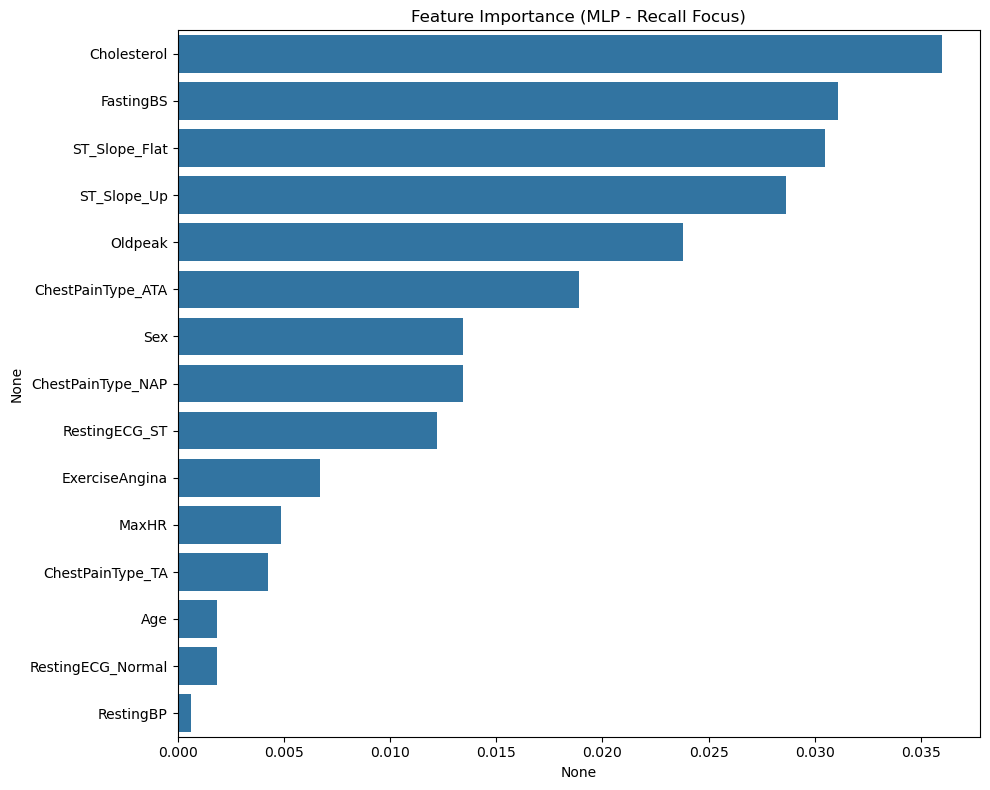

Cholesterol          0.035976
FastingBS            0.031098
ST_Slope_Flat        0.030488
ST_Slope_Up          0.028659
Oldpeak              0.023780
ChestPainType_ATA    0.018902
Sex                  0.013415
ChestPainType_NAP    0.013415
RestingECG_ST        0.012195
ExerciseAngina       0.006707
MaxHR                0.004878
ChestPainType_TA     0.004268
Age                  0.001829
RestingECG_Normal    0.001829
RestingBP            0.000610
dtype: float64


In [36]:
result = permutation_importance(model1,
                                x_test,y_test,
                                n_repeats=10,
                                random_state=42,
                                scoring='recall')

importances = pd.Series(data=result.importances_mean,index=x.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=importances,
            y=importances.index,
            orient='h').set_title("Feature Importance (MLP - Recall Focus)")
plt.show();

print(importances)

---

# NEW MODEL (MODEL 2.0)

In [38]:
x_train2 = x_train.drop(columns=['ExerciseAngina','MaxHR','ChestPainType_TA','Age','RestingECG_Normal','RestingBP']).copy()
x_test2 = x_test.drop(columns=['ExerciseAngina','MaxHR','ChestPainType_TA','Age','RestingECG_Normal','RestingBP']).copy()
print(x_train2.columns.tolist())
print(x_test2.columns.tolist())

['Sex', 'Cholesterol', 'FastingBS', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up']
['Sex', 'Cholesterol', 'FastingBS', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up']


In [39]:
model2 = MLPClassifier(hidden_layer_sizes=(100,), 
                       activation='tanh',         
                       solver='adam',             
                       alpha=0.0001,             
                       learning_rate='constant',  
                       max_iter=1000,            
                       random_state=42)           

model2.fit(x_train2, y_train)

,hidden_layer_sizes,"(100,)"
,activation,'tanh'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


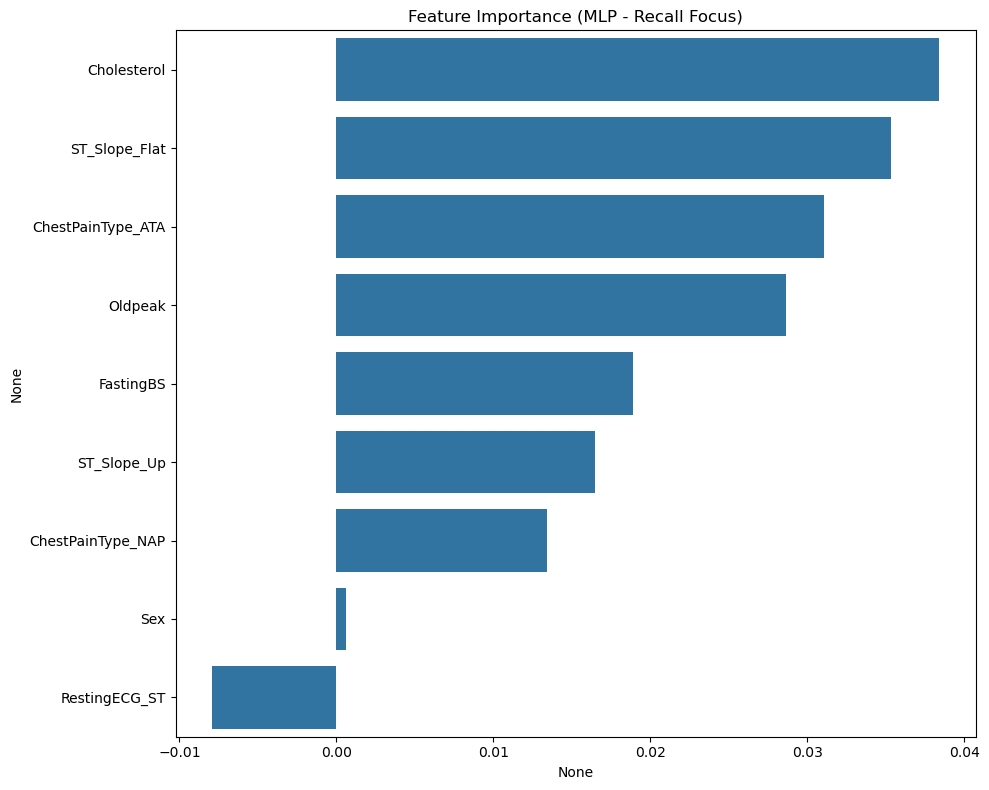

Cholesterol          0.038415
ST_Slope_Flat        0.035366
ChestPainType_ATA    0.031098
Oldpeak              0.028659
FastingBS            0.018902
ST_Slope_Up          0.016463
ChestPainType_NAP    0.013415
Sex                  0.000610
RestingECG_ST       -0.007927
dtype: float64


In [41]:
result = permutation_importance(model2,
                                x_test2,
                                y_test,
                                n_repeats=10,
                                random_state=42,
                                scoring='recall')

importances = pd.Series(data=result.importances_mean,index=x_test2.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=importances,
            y=importances.index,
            orient='h').set_title("Feature Importance (MLP - Recall Focus)")
plt.show();

print(importances)

---

# NEW MODEL ( MODEL 3.0)

In [45]:
x_train3 = x_train.drop(columns=['Sex','RestingECG_ST','ExerciseAngina','MaxHR','ChestPainType_TA','Age','RestingECG_Normal','RestingBP']).copy()
x_test3 = x_test.drop(columns=['Sex','RestingECG_ST','ExerciseAngina','MaxHR','ChestPainType_TA','Age','RestingECG_Normal','RestingBP']).copy()
print(x_train3.columns.tolist())
print(x_test3.columns.tolist())

['Cholesterol', 'FastingBS', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ST_Slope_Flat', 'ST_Slope_Up']
['Cholesterol', 'FastingBS', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ST_Slope_Flat', 'ST_Slope_Up']


In [46]:
model3 = MLPClassifier(hidden_layer_sizes=(100,), 
                       activation='tanh',         
                       solver='adam',             
                       alpha=0.0001,             
                       learning_rate='constant',  
                       max_iter=1000,            
                       random_state=42)           

model3.fit(x_train3, y_train)

,hidden_layer_sizes,"(100,)"
,activation,'tanh'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


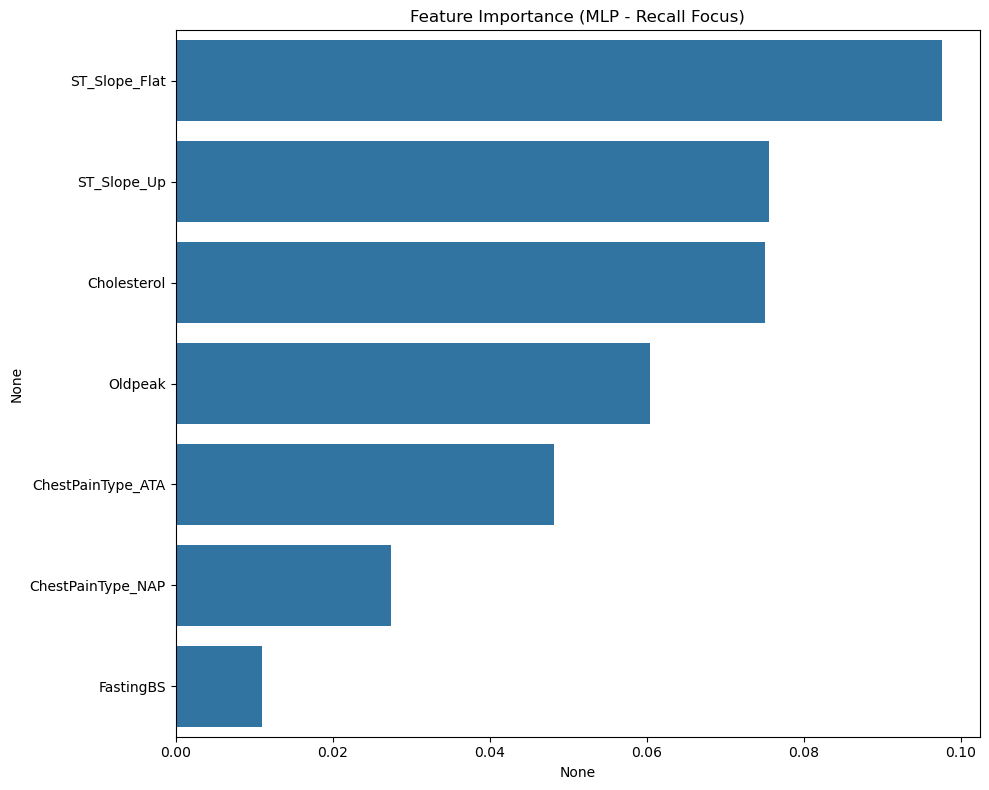

ST_Slope_Flat        0.097561
ST_Slope_Up          0.075610
Cholesterol          0.075000
Oldpeak              0.060366
ChestPainType_ATA    0.048171
ChestPainType_NAP    0.027439
FastingBS            0.010976
dtype: float64


In [47]:
result = permutation_importance(model3,
                                x_test3,
                                y_test,
                                n_repeats=10,
                                random_state=42,
                                scoring='recall')

importances = pd.Series(data=result.importances_mean,index=x_test3.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=importances,
            y=importances.index,
            orient='h').set_title("Feature Importance (MLP - Recall Focus)")
plt.show();

print(importances)

---

In [48]:
import joblib 
joblib.dump(model3,'Model_MLPClassifier.pkl')

['Model_MLPClassifier.pkl']

In [49]:
joblib.dump(x_train3.columns.tolist(), 'features_v3.pkl')

['features_v3.pkl']